In [24]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [4]:
df = pd.read_csv('airline_passenger_satisfaction.csv')

In [5]:
# Display the first few rows of the dataset
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [36]:
# Check for missing values
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [6]:

# Impute missing values in 'Arrival Delay in Minutes' column with the median
df['Arrival Delay'].fillna(df['Arrival Delay'].median(), inplace=True)

# Create a new column 'Churn' based on 'satisfaction'
df['Churn'] = df['Satisfaction'].apply(lambda x: 1 if x == 'Neutral or Dissatisfied' else 0)

# Convert categorical variables to numeric using one-hot encoding
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)


0         1
1         0
2         0
3         0
4         0
         ..
129875    1
129876    1
129877    1
129878    0
129879    1
Name: Churn, Length: 129880, dtype: int64

In [13]:
df

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Churn,Age Group
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,2,5,5,5,3,5,5,Neutral or Dissatisfied,1,45-59
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,5,3,5,2,5,5,Satisfied,0,30-44
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,5,3,4,3,3,Satisfied,0,30-44
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,4,4,5,2,5,5,Satisfied,0,45-59
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,5,4,3,3,3,3,Satisfied,0,45-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,4,4,4,5,4,4,4,Neutral or Dissatisfied,1,18-29
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,2,4,3,2,5,Neutral or Dissatisfied,1,30-44
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,4,3,3,4,2,3,5,Neutral or Dissatisfied,1,30-44
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,5,3,3,4,5,3,5,Satisfied,0,45-59


In [14]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Churn
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.045465,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114,0.565537
std,37493.270818,15.119360,997.452477,38.071126,38.416353,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025,0.495688
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,0.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,1.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,1.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [15]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:

# Separate the features and target variable
X = df.drop('Satisfaction', axis=1)
y = df['Satisfaction']

# Convert categorical variables to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Apply SMOTE
smote = SMOTE(random_state=42)



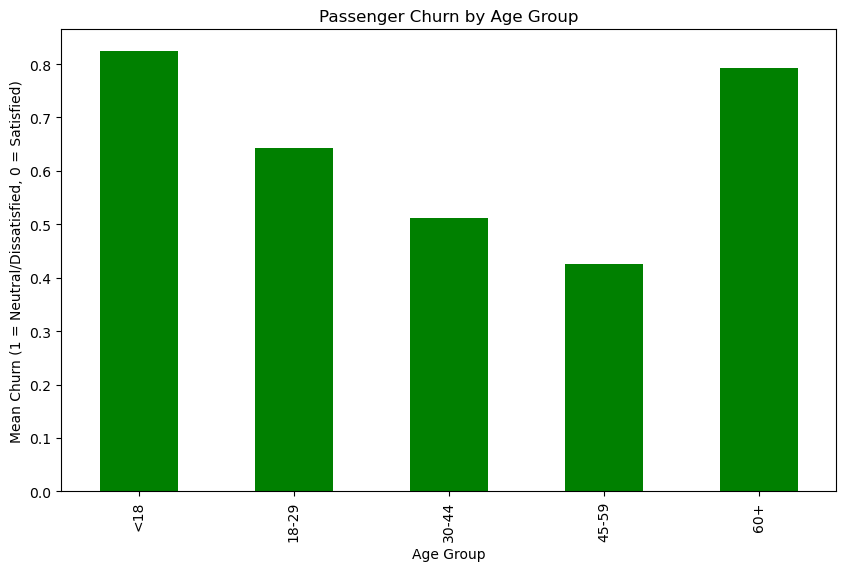

In [27]:


# Define age groups
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-29', '30-44', '45-59', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate mean satisfaction score for each age group
age_group_satisfaction = df.groupby('Age Group')['Churn'].mean()

# Plot the satisfaction by age group
plt.figure(figsize=(10, 6))
age_group_satisfaction.plot(kind='bar', color='green')
plt.title('Passenger Churn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Churn (1 = Neutral/Dissatisfied, 0 = Satisfied)')
plt.show()


In [17]:
churn_rate = df['Churn'].mean()

In [18]:
churn_rate

0.5655374191561441

In [25]:
# Create a contingency table
contingency_table = pd.crosstab(df['Satisfaction'], df['Churn'])

# Perform chi-square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f'Chi-square Test Statistic: {chi2}')
print(f'p-value: {p}')


Chi-square Test Statistic: 129875.93010809732
p-value: 0.0


In [26]:
contingency_table

Churn,0,1
Satisfaction,,
Neutral or Dissatisfied,0,73452
Satisfied,56428,0


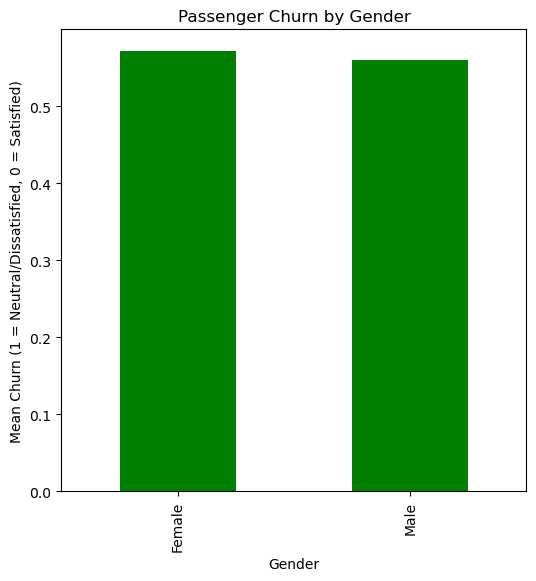

In [31]:
# Calculate mean satisfaction score for each gender
gender_satisfaction = df.groupby('Gender')['Churn'].mean()

# Plot the satisfaction by gender
plt.figure(figsize=(6, 6))
gender_satisfaction.plot(kind='bar', color='green')
plt.title('Passenger Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Churn (1 = Neutral/Dissatisfied, 0 = Satisfied)')
plt.show()


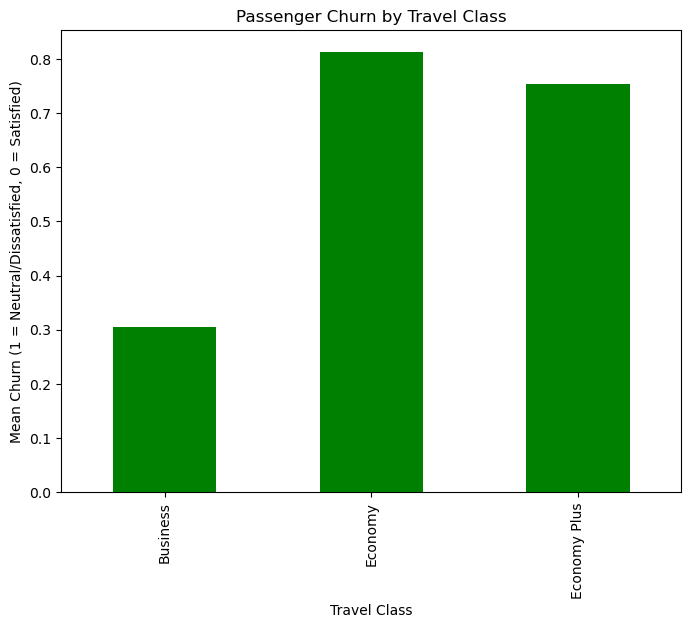

In [33]:
# Calculate mean satisfaction score for each class
class_satisfaction = df.groupby('Class')['Churn'].mean()

# Plot the satisfaction by class
plt.figure(figsize=(8, 6))
class_satisfaction.plot(kind='bar', color='green')
plt.title('Passenger Churn by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Mean Churn (1 = Neutral/Dissatisfied, 0 = Satisfied)')
plt.show()


In [21]:
# Age Distribution

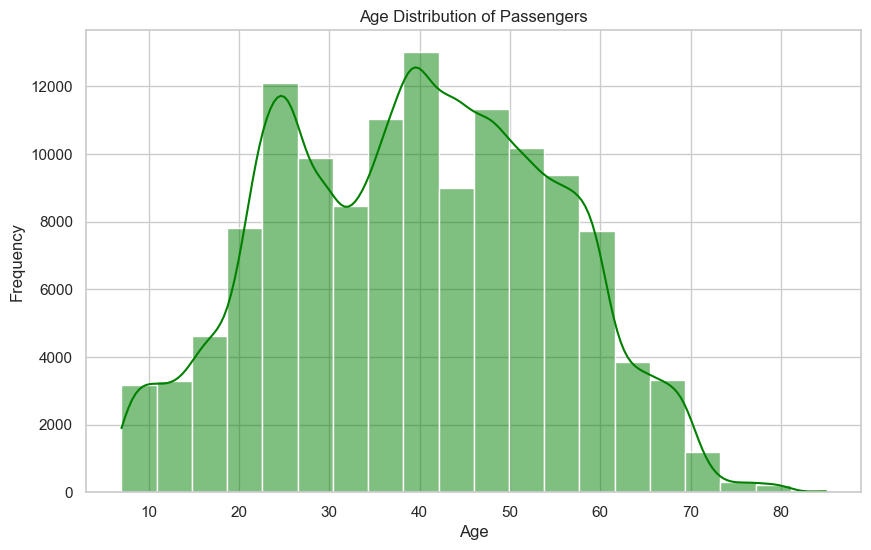

In [18]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='green')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Satisfaction Levels

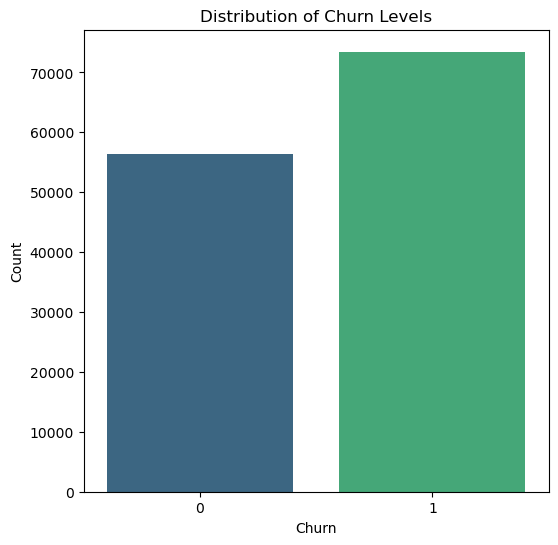

In [51]:
# Satisfaction Levels
plt.figure(figsize=(6, 6))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Churn Levels')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


Class Distribution

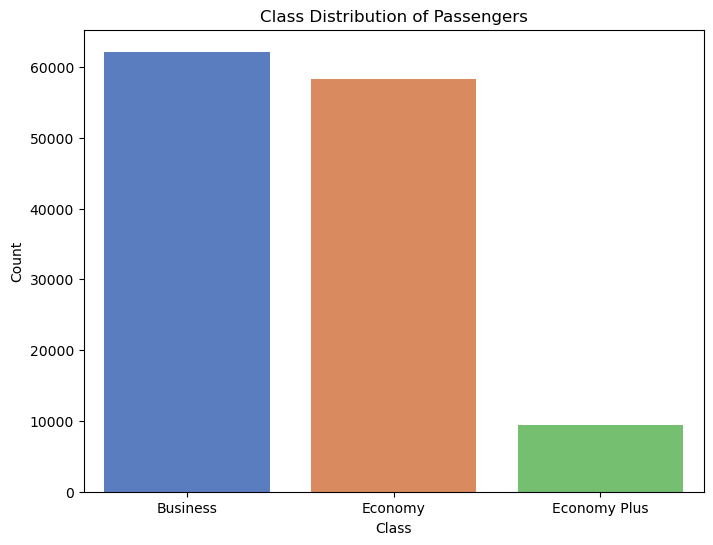

In [35]:
# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, palette='muted')
plt.title('Class Distribution of Passengers')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Bivariate Analysis

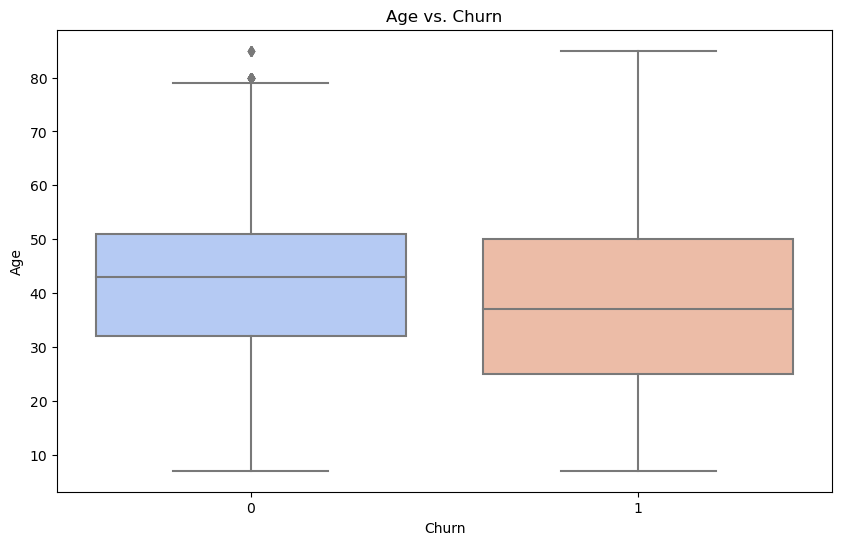

In [52]:
# Age vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Age', data=df, palette='coolwarm')
plt.title('Age vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()


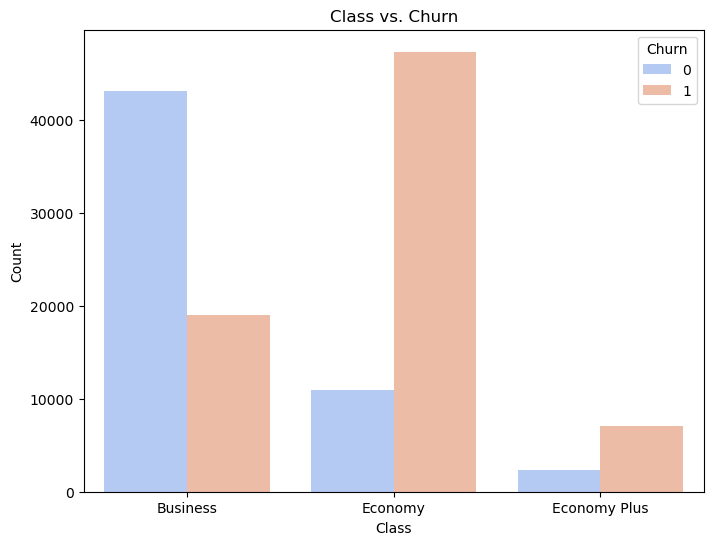

In [38]:
# Class vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', hue='Churn', data=df, palette='coolwarm')
plt.title('Class vs. Churn')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


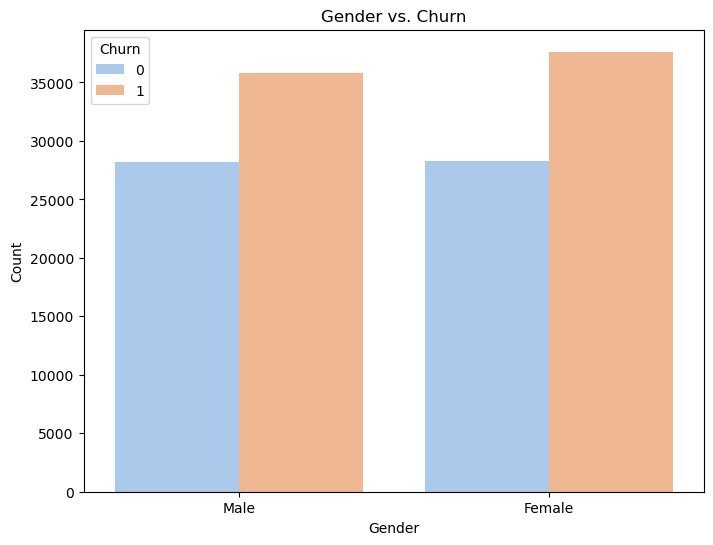

In [53]:
# Gender vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Churn', data=df, palette='pastel')
plt.title('Gender vs. Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


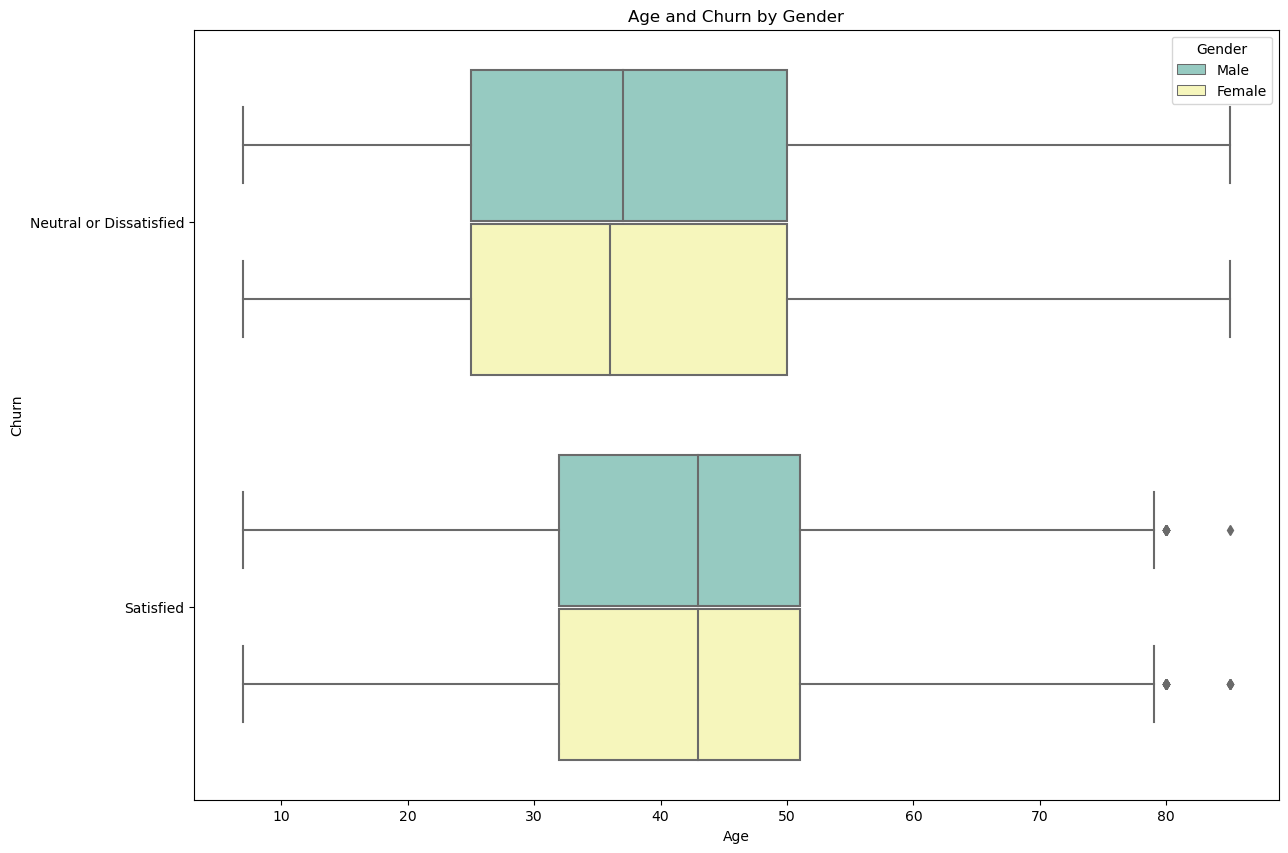

In [54]:
# Age, Gender, and churn
plt.figure(figsize=(14, 10))
sns.boxplot(x='Age', y='Satisfaction', hue='Gender', data=df, palette='Set3')
plt.title('Age and Churn by Gender')
plt.xlabel('Age')
plt.ylabel('Churn')
plt.show()


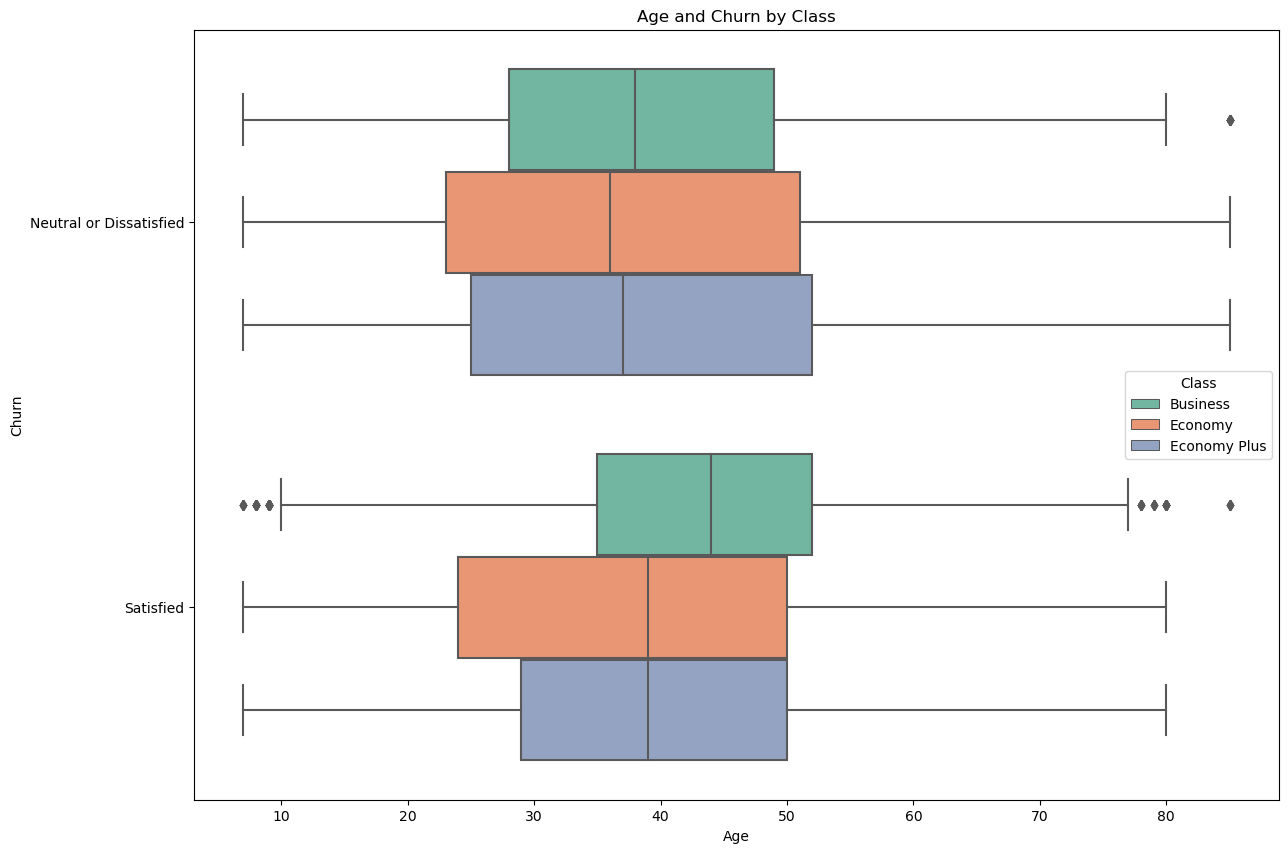

In [55]:
# Age, Class, and Satisfaction
plt.figure(figsize=(14, 10))
sns.boxplot(x='Age', y='Satisfaction', hue='Class', data=df, palette='Set2')
plt.title('Age and Churn by Class')
plt.xlabel('Age')
plt.ylabel('Churn')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_9496\1645323671.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


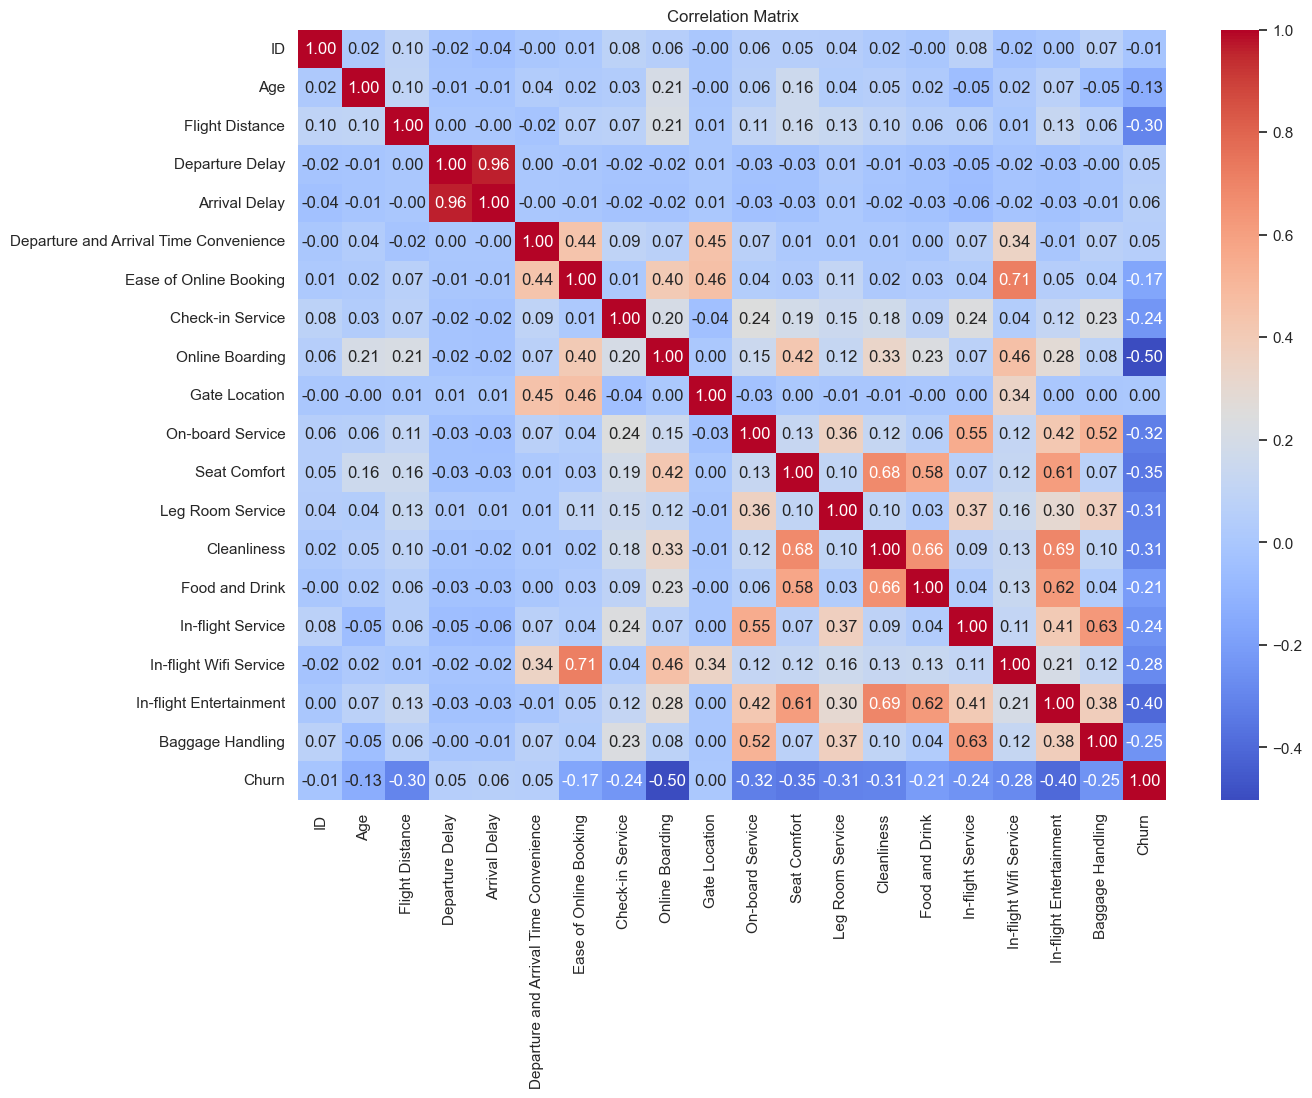

In [29]:
# Heatmap of Correlations
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
